In [151]:
#probeersel 2!!!

!pip3 install keras
!pip3 install tensorflow

In [152]:
!pip3 install certifi
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [15]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image

# Load the pre-trained VGG16 model
vgg=VGG16(include_top=False, pooling='avg', weights='imagenet',
input_shape=(178, 218, 3))

In [176]:
vgg=VGG16(include_top=False, pooling='avg', weights='imagenet',
input_shape=(178, 218, 3))
#vgg = Sequential(layers=vgg.layers)

In [16]:
# Freeze the layers except the last 5
for layer in vgg.layers[:-5]:
 layer.trainable = False# Check the trainable status of the individual layers
for layer in vgg.layers:
 print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x29bccf7c0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x29bccc6d0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x172caaf50> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x29bccf130> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x172c5a3e0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x29bd48520> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x29bd49ae0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x29bd4a4a0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x29bd4aad0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x29bd4b070> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x29bd4ab90> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x29bd4b9d0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x29bd44f70> False
<keras.sr

In [17]:
# Create the model
from keras.models import Sequential
import keras
model = keras.Sequential()# Add the VGG16 convolutional base model
model.add(vgg)

 
# Add new layers
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(2, activation='sigmoid'))
#input_shape=(None,224,224,3)
#model.build(input_shape)



In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 14781122 (56.39 MB)
Trainable params: 7145602 (27.26 MB)
Non-trainable params: 7635520 (29.13 MB)
_________________________________________________________________


In [9]:
# de data opspliten in train en validation set, code van chatGPT

import os
from sklearn.model_selection import train_test_split
import shutil

base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create the directories if they don't exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

# Move the 'men' and 'women' directories to the 'train' directory
men_source_dir = os.path.join(base_dir, 'men')
women_source_dir = os.path.join(base_dir, 'women')

men_target_dir = os.path.join(train_dir, 'men')
women_target_dir = os.path.join(train_dir, 'women')

shutil.move(men_source_dir, men_target_dir)
shutil.move(women_source_dir, women_target_dir)

# Split the data into training and validation sets
train_data_dir = train_dir  # Use the 'train' directory as the training data directory

# Create the 'validation' directory inside 'base_dir'
validation_data_dir = os.path.join(base_dir, 'validation')

# Split the data into training and validation sets
train_ratio = 0.8  # Adjust the ratio as needed
validation_ratio = 0.2  # Adjust the ratio as needed

men_files = os.listdir(men_target_dir)
women_files = os.listdir(women_target_dir)

men_train, men_val = train_test_split(men_files, train_size=train_ratio, test_size=validation_ratio, random_state=42)
women_train, women_val = train_test_split(women_files, train_size=train_ratio, test_size=validation_ratio, random_state=42)

# Move the training and validation files to their respective directories
for file in men_train:
    source = os.path.join(men_target_dir, file)
    destination = os.path.join(train_data_dir, 'men', file)
    shutil.move(source, destination)

for file in women_train:
    source = os.path.join(women_target_dir, file)
    destination = os.path.join(train_data_dir, 'women', file)
    shutil.move(source, destination)

# Create the 'men' and 'women' directories inside 'validation_data_dir'
validation_men_dir = os.path.join(validation_data_dir, 'men')
validation_women_dir = os.path.join(validation_data_dir, 'women')

os.makedirs(validation_men_dir, exist_ok=True)
os.makedirs(validation_women_dir, exist_ok=True)

for file in men_val:
    source = os.path.join(men_target_dir, file)
    destination = os.path.join(validation_men_dir, file)
    shutil.move(source, destination)

for file in women_val:
    source = os.path.join(women_target_dir, file)
    destination = os.path.join(validation_women_dir, file)
    shutil.move(source, destination)


FileNotFoundError: [Errno 2] No such file or directory: 'data/men'

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 128)               128128    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 138486442 (528.28 MB)
Trainable params: 123771498 (472.15 MB)
Non-trainable params: 14714944 (56.13 MB)
_________________________________________________________________


In [22]:
# Hier gebruiken we onze eigen data
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
 'data/train',   
 target_size=(178, 218),
 batch_size=12,
 class_mode='categorical')

 
validation_generator = data_generator.flow_from_directory(
 'data/validation',   
 target_size=(178, 218),
 batch_size=12,
 class_mode='categorical')

# Define your callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) #ik heb val_loss veranderd in loss want kreeg daar een warning over
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True)

# Create a list of callbacks
cb_list = [early_stopping, model_checkpoint]
 

model.fit(
 train_generator,
 epochs=1, # misschien moet dit wat minder, want het duurt nu ongeveer 1.5 uur om te runnen en ik weet niet of hij overfit
 steps_per_epoch=2646/12, # ik heb dit veranderd naar train_set size / batch size want ik kreeg een soort error eerst
 validation_data=validation_generator,
 validation_steps=667, callbacks=cb_list)



Found 2646 images belonging to 2 classes.
Found 663 images belonging to 2 classes.
220/220 [==============================] - 284s 1s/step - loss: 0.4146 - accuracy: 0.8099 - val_loss: 0.6050 - val_accuracy: 0.7330


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# feature visualization, code van towardsdatascience die website

import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 178, 218, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 178, 218, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 178, 218, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 89, 109, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 89, 109, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 89, 109, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 44, 54, 128)       0     

In [24]:
img_path='data/validation/women/00000010.jpg' #image of woman

img = load_img(img_path, target_size=(178, 218))  # this is a PIL image

# img.show()

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0
y_pred=vgg.predict(x)
#_pred =(y_pred>0.5)
print(y_pred)

train_generator.class_indices

def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 149ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.55193663e+00 1.27723320e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.89040863e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.42689743e+01
  0.00000000e+00 9.36422195e+01 0.00000000e+00 0.00000000e+00
  2.06058685e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.39007435e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.14280502e+02 3.11647377e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 

In [26]:
from matplotlib import pyplot as plt

yes
block1_conv1 (3, 3, 3, 64)
3


yes
block1_conv2 (3, 3, 64, 64)
3


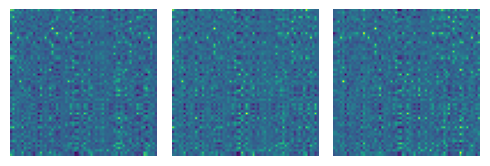

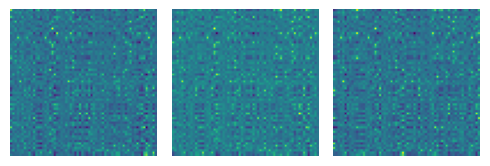

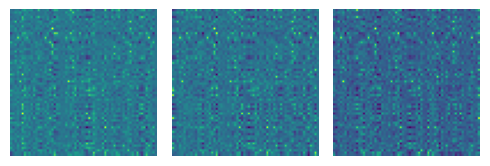

yes
block2_conv1 (3, 3, 64, 128)
3


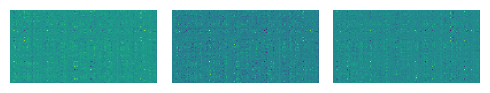

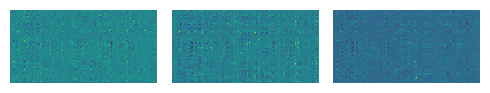

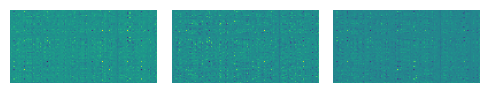

yes
block2_conv2 (3, 3, 128, 128)
3


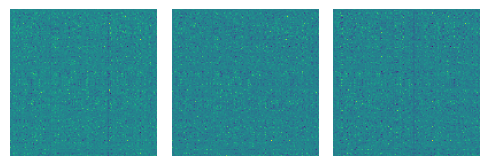

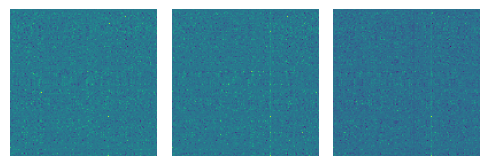

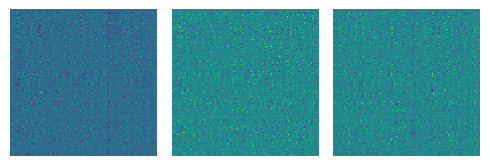

yes
block3_conv1 (3, 3, 128, 256)
3


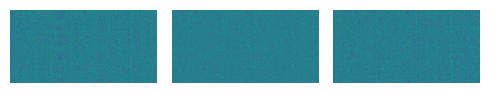

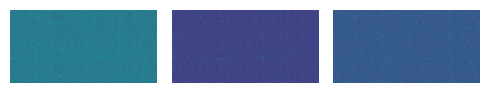

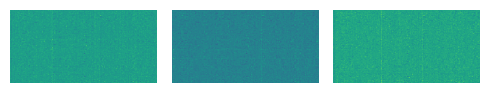

yes
block3_conv2 (3, 3, 256, 256)
3


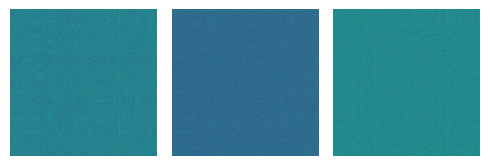

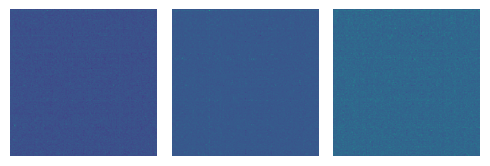

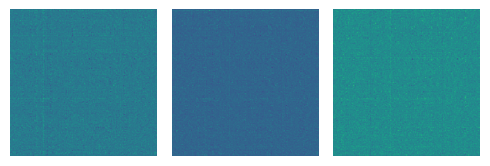

yes
block3_conv3 (3, 3, 256, 256)
3


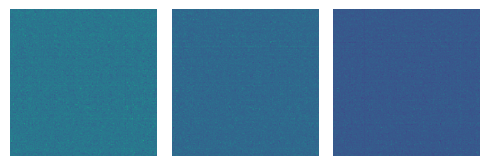

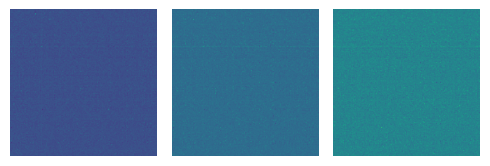

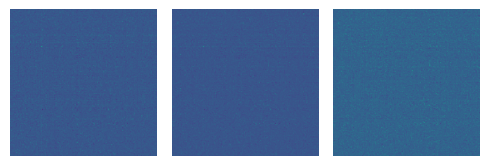

yes
block4_conv1 (3, 3, 256, 512)
3


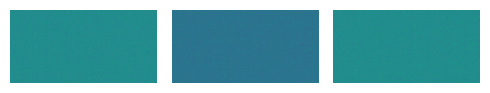

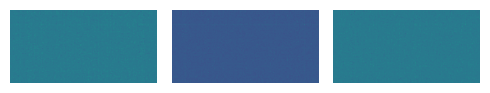

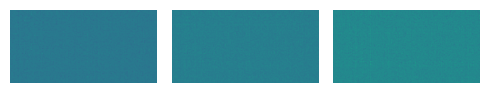

yes
block4_conv2 (3, 3, 512, 512)
3


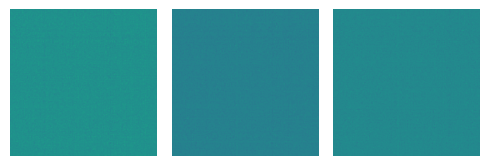

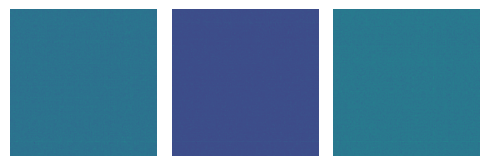

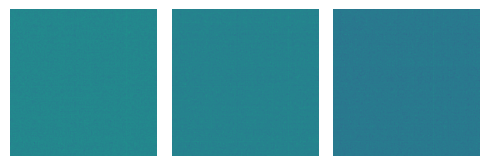

yes
block4_conv3 (3, 3, 512, 512)
3


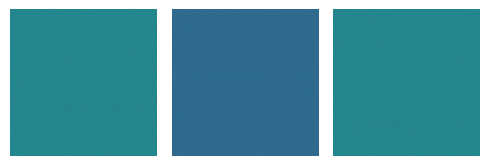

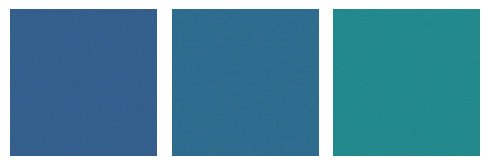

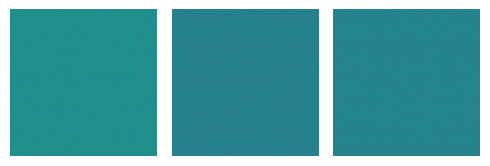

yes
block5_conv1 (3, 3, 512, 512)
3


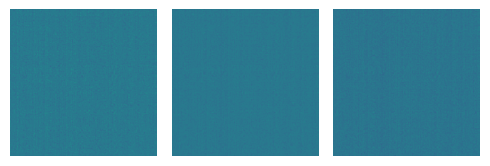

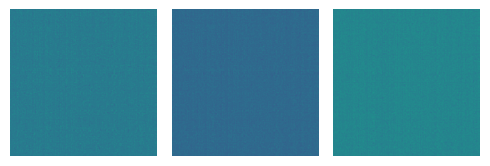

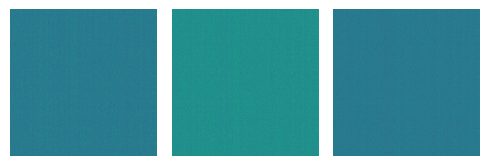

yes
block5_conv2 (3, 3, 512, 512)
3


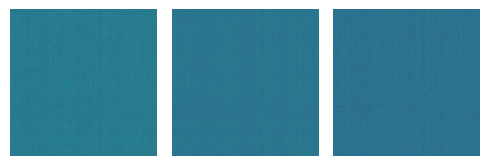

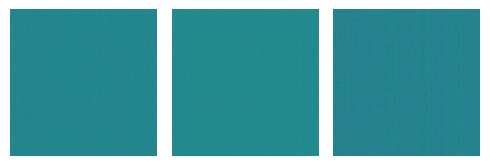

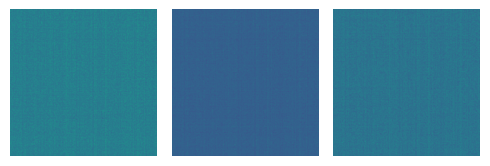

yes
block5_conv3 (3, 3, 512, 512)
3


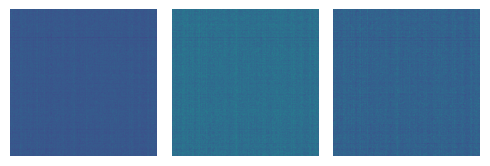

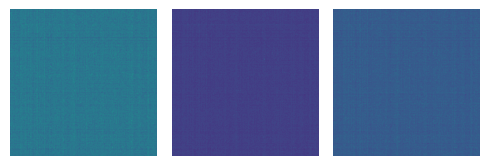

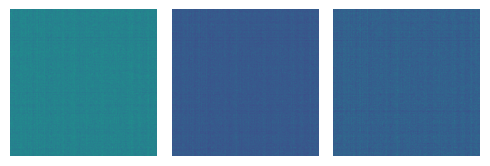

In [27]:
for layer in vgg.layers:
    if 'conv' in layer.name:
        print('yes')
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[1])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[1]):
        #for i in range(6):
            #get the filters
            filt=filters[:, i]
            plotFilters(filt)

block1_conv1 (3, 3, 3, 64)
64


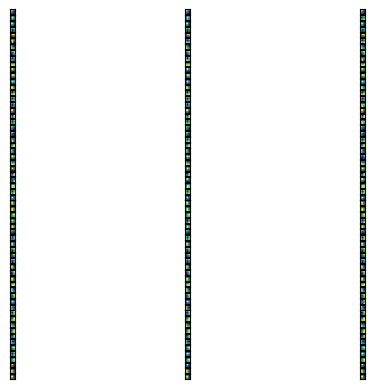

block1_conv2 (3, 3, 64, 64)
64


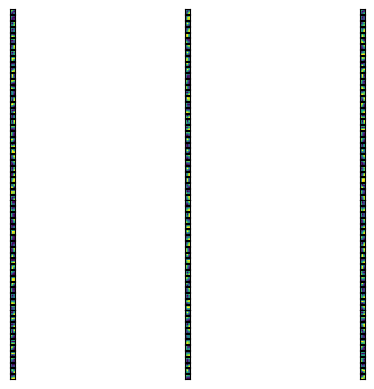

block2_conv1 (3, 3, 64, 128)
128


KeyboardInterrupt: 

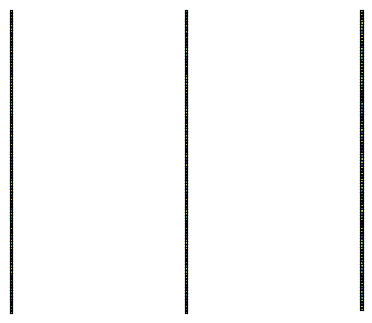

In [28]:
#Visualizing the filters -> deze code duurt tering lang om te runnen en ik zit in de trein nu
#plt.figure(figsize=(5,5))
for layer in vgg.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, weights.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(weights.shape[3])
        filter_cnt=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting ecah channel
            for j in range(filters.shape[0]):
                #plt.figure( figsize=(5, 5) )
                #f = plt.figure(figsize=(10,10))
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()
        

In [ ]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

1/1 [==============================] - 0s 154ms/step
(1, 178, 218, 64)


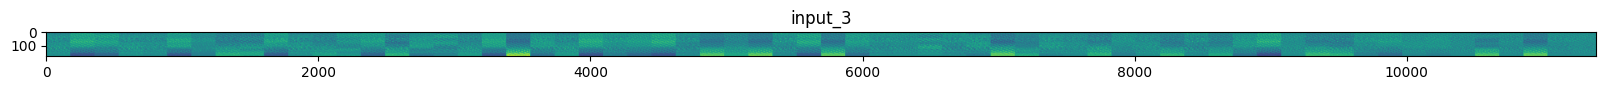

In [29]:
# img_path is zelfde plaatje als eerder

successive_outputs = [layer.output for layer in vgg.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = vgg.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
#cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
#dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

#img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(178, 218))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in vgg.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x = np.resize(x, (size, size))
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
    break

In [1]:
plt.imshow(display_grid[:,:218])

NameError: name 'plt' is not defined

1/1 [==============================] - 0s 200ms/step
(1, 178, 218, 64)
(1, 178, 218, 64)
(1, 89, 109, 64)
(1, 89, 109, 128)
(1, 89, 109, 128)
(1, 44, 54, 128)
(1, 44, 54, 256)
(1, 44, 54, 256)
(1, 44, 54, 256)
(1, 22, 27, 256)
(1, 22, 27, 512)
(1, 22, 27, 512)
(1, 22, 27, 512)
(1, 11, 13, 512)
(1, 11, 13, 512)
(1, 11, 13, 512)
(1, 11, 13, 512)
(1, 5, 6, 512)
(1, 512)


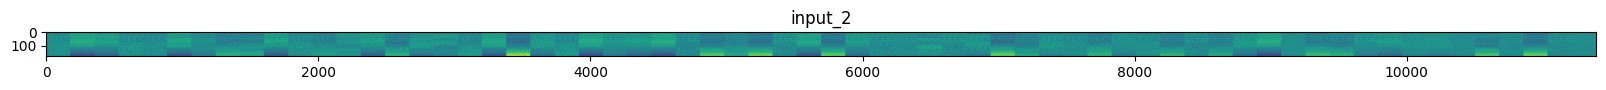

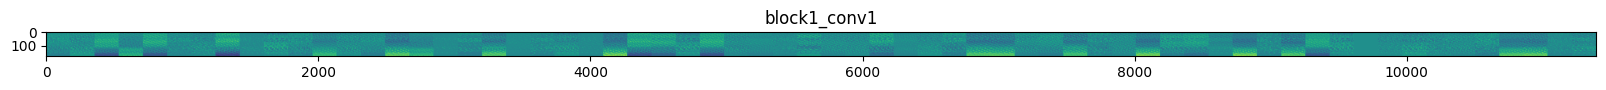

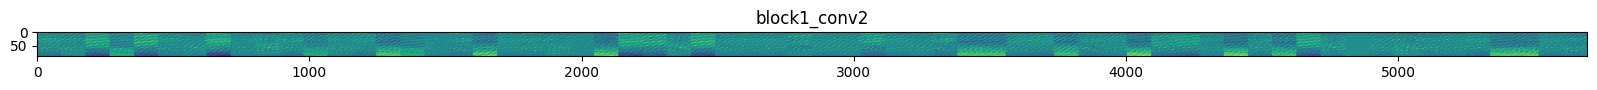

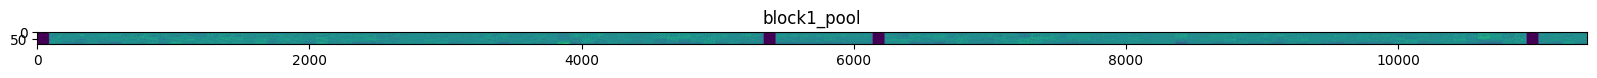

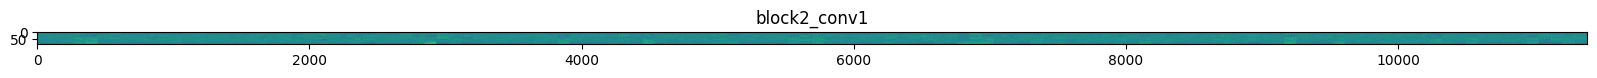

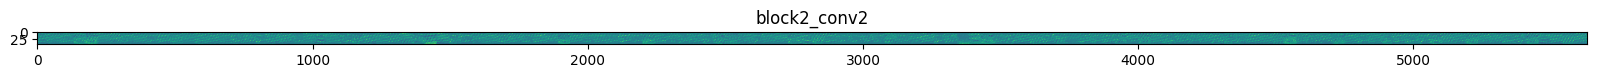

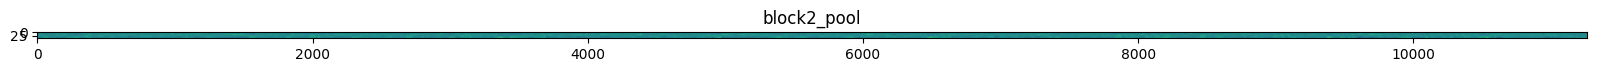

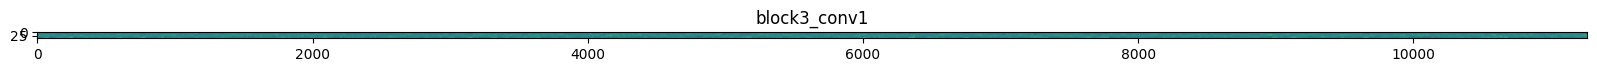

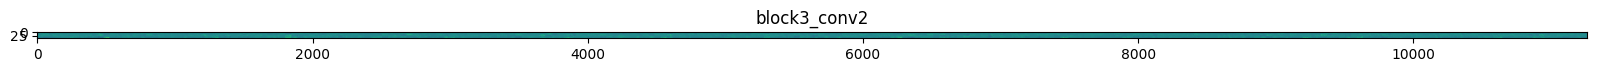

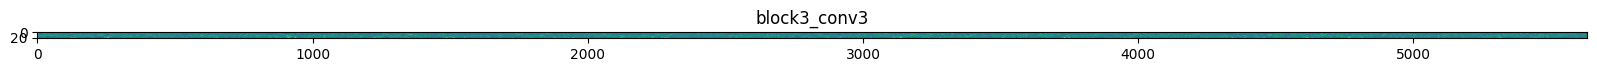

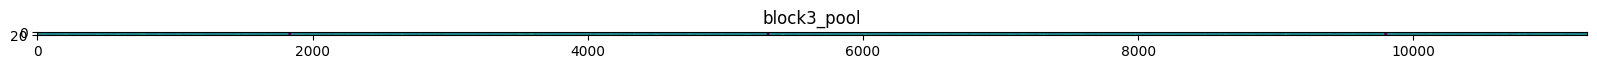

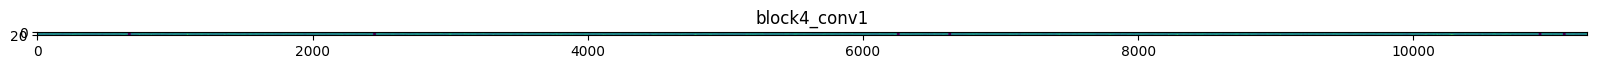

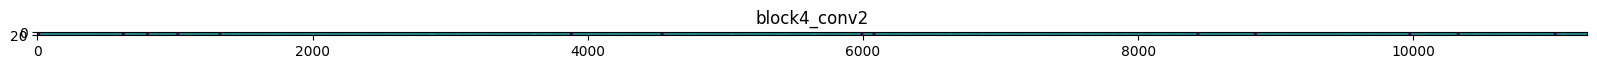

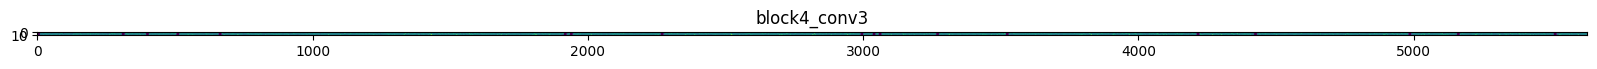

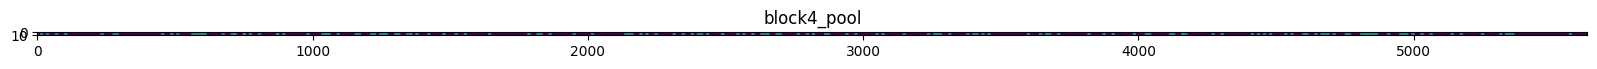

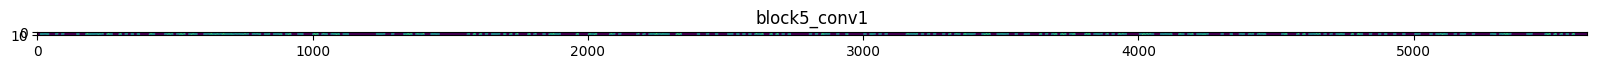

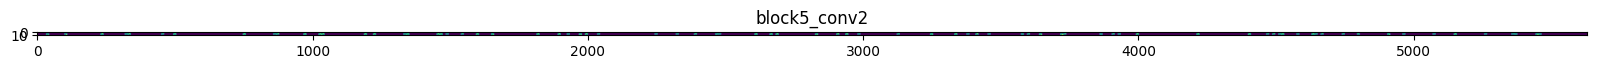

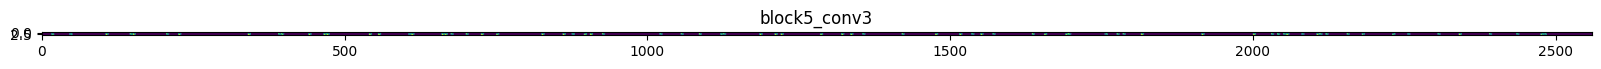

In [ ]:
successive_outputs = [layer.output for layer in vgg.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = vgg.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(178, 218))  
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img) 
                          
x   = x.reshape((1,) + x.shape)                   
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in vgg.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x = np.resize(x, (size, size))
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x 

    # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [166]:
model.layers[0].

In [ ]:
acc = history.history['acc'] #history is model.fit() dus dat had ik niet geinitialiseerd, moet nog een keer
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'history' is not defined